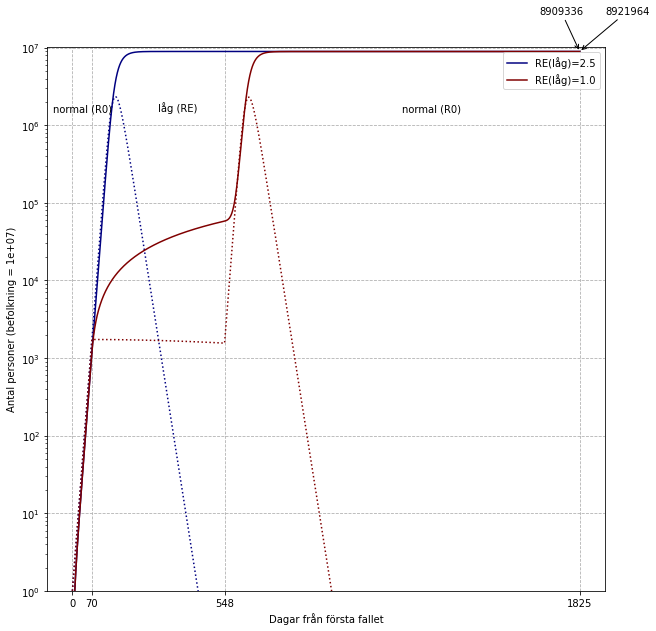

<function __main__.interact_toy(lam, R0, RE, t_low, t_normal, t_max, pop)>

In [1]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

import matplotlib.cm as cm
import numpy as np
import matplotlib.pylab as plt

from epidemic_compute import simulate




def plot_epidemic(ts, xs, ys, zs,lam, R0, REs, t_low, t_normal, t_max, pop):
    '''
    Function to plot pandemic data
    
    inputs:
    ts, xs, ys, zs,lam, R0, REs, t_low, t_normal, t_max, pop
    
    sideeffects:
    plots stuff in ax
    
    returns:
    ax
    
    '''
    plt.figure(figsize=[10,10])
    
    ax1=plt.gca()
    
    plotm=np.array([0,1],dtype=int)
    
    cmap=cm.jet
    colors= [cmap(number) for number in np.linspace(0,1,num=len(plotm))]
    
    [ax1.semilogy(ts, y, ls=':', color=color) for (y, color) in zip(np.array(ys).T[plotm], colors)]
    [ax1.semilogy(ts, z, ls='-', color=color, label='RE(låg)={:.2}'.format(r)) for (r, z, color) in zip(REs[plotm], np.array(zs).T[plotm], colors)]

    ax1.grid(which='major', axis='both', linestyle='--')
    ax1.set_xticks([0, t_low, t_normal, ts[-1]])

    ax1.text(t_low/2, 1.5e6, f'normal (R0)', horizontalalignment='center')
    ax1.text((t_low+t_normal)/2, 1.5e6, f'låg (RE)')
    ax1.text((t_normal+ts[-1])/2, 1.5e6, f'normal (R0)')

    ax1.annotate(f'{int(zs[-1][0])}', (ts[-1], zs[-1][0]),
                 xytext=(1.05*ts[-1], 3*zs[-1][0]),
                 arrowprops={'arrowstyle': '->'})
    ax1.annotate(f'{int(zs[-1][-1])}', (ts[-1], zs[-1][-1]),
                 xytext=(0.92*ts[-1], 3*zs[-1][-1]),
                 arrowprops={'arrowstyle': '->'})
    ax1.set_ylim([1, pop*1.01])
    ax1.set_xlabel('Dagar från första fallet')
    ax1.set_ylabel('Antal personer (befolkning = {0:.0e})'.format(pop))
    ax1.legend()
    
    return ax1


def interact_toy(lam, R0, RE, t_low, t_normal, t_max, pop):
    REs=np.array([R0,RE])
    ts, xs, ys, zs=simulate(lam, R0, REs, t_low, t_normal, t_max, pop)
    plot_epidemic(ts, xs, ys, zs,lam, R0, REs, t_low, t_normal, t_max, pop)


interact(interact_toy,
        RE=widgets.FloatSlider(min=0, max=2.4, steps=0.2,value=1,orientation='horizontal'), 
        lam=widgets.IntSlider(min=1,max=20,value=14),
        R0=fixed(2.5),  
        t_low=fixed(70),
        t_normal=fixed(365*1.5), 
        t_max=fixed(365*5),
        pop=fixed(10000000))
            
